C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_10360\3236054972.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Attack Type", data=data, order=data["Attack Type"].value_counts().index, palette="viridis")


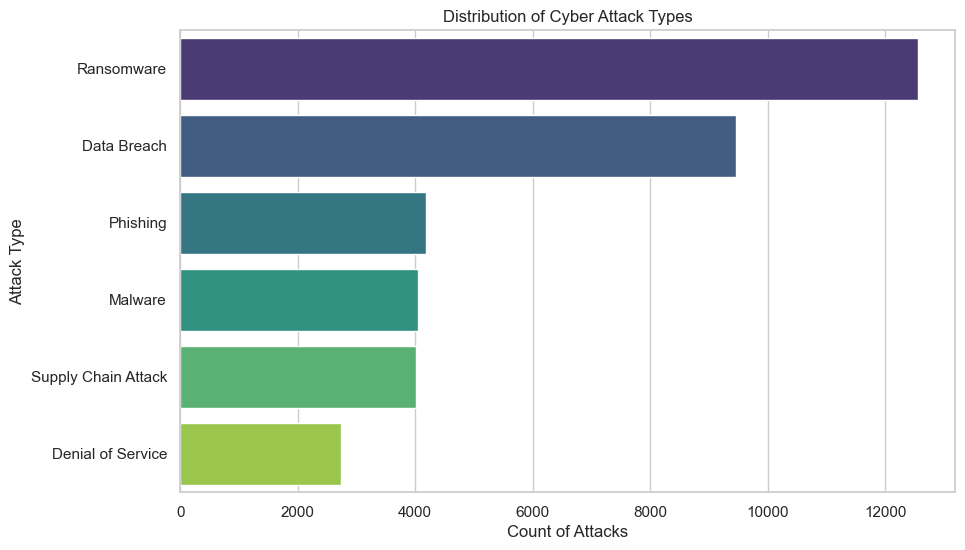

C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_10360\3236054972.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Country", data=data, order=data["Country"].value_counts().index[:10], palette="inferno")


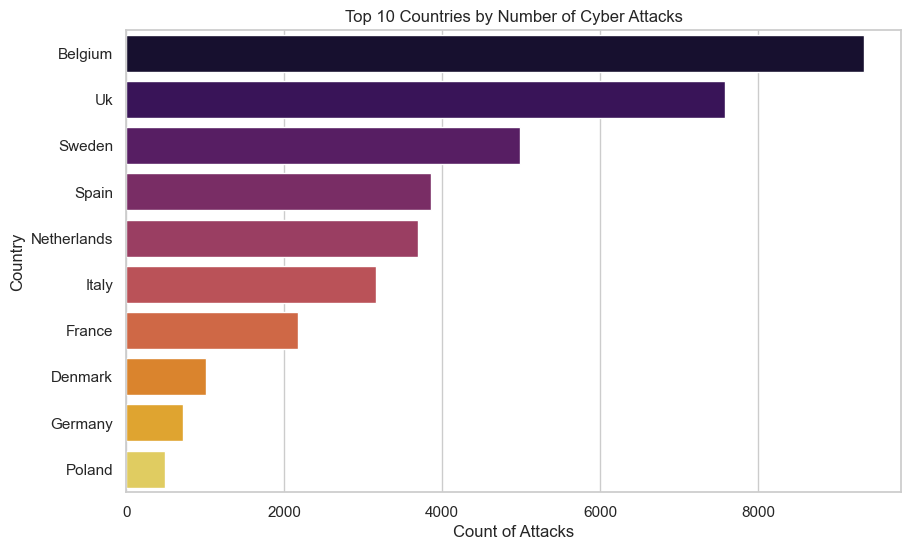

C:\Users\JasonGreich\AppData\Local\Temp\ipykernel_10360\3236054972.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year", data=data, palette="coolwarm")


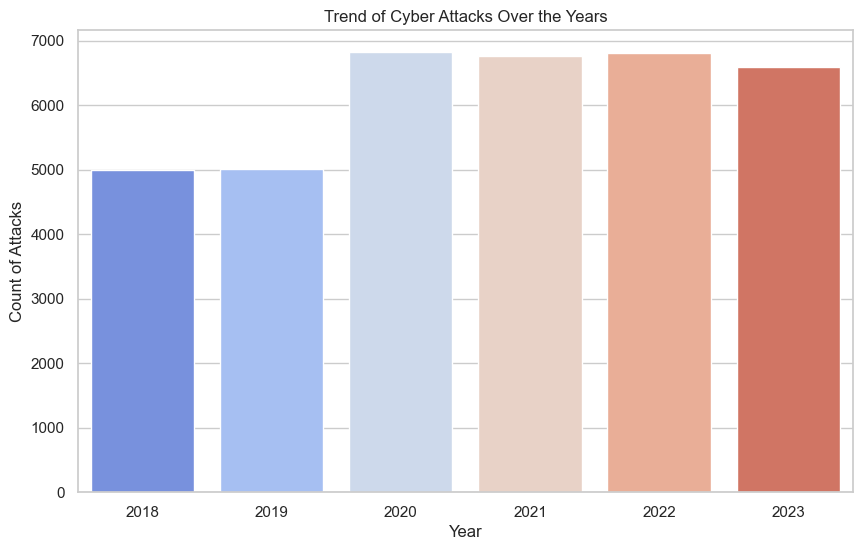

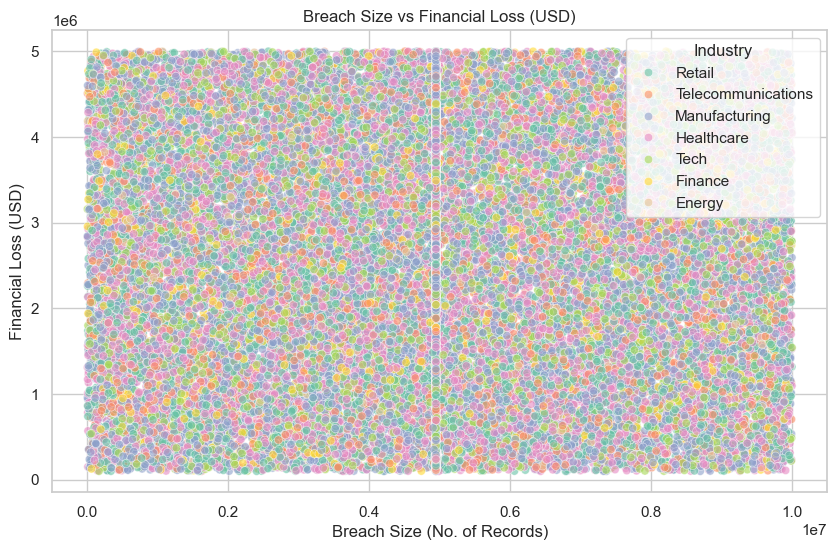

,Unnamed: 0,Incident ID,Breach Size (No. of Records),Financial Loss (USD),Mitigation Time (Days),Year,Month,Day
count,37000.000000,37000.000000,3.700000e+04,3.700000e+04,37000.000000,37000.000000,37000.000000,37000.000000
mean,18499.500000,18500.500000,4.972400e+06,2.540877e+06,32.530811,2020.681000,6.548568,15.696541
std,10681.124317,10681.124317,2.638589e+06,1.411672e+06,16.146655,1.654189,3.432722,8.802976
min,0.000000,1.000000,1.007500e+04,1.002547e+05,5.000000,2018.000000,1.000000,1.000000
25%,9249.750000,9250.750000,2.972572e+06,1.319759e+06,19.000000,2019.000000,4.000000,8.000000
50%,18499.500000,18500.500000,4.950575e+06,2.534882e+06,32.000000,2021.000000,7.000000,16.000000
75%,27749.250000,27750.250000,6.966304e+06,3.763184e+06,46.000000,2022.000000,10.000000,23.000000
max,36999.000000,37000.000000,9.999246e+06,4.999991e+06,60.000000,2023.000000,12.000000,31.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of attack types
plt.figure(figsize=(10, 6))
sns.countplot(y="Attack Type", data=data, order=data["Attack Type"].value_counts().index, palette="viridis")
plt.title("Distribution of Cyber Attack Types")
plt.xlabel("Count of Attacks")
plt.ylabel("Attack Type")
plt.show()

# 2. Distribution of incidents by country
plt.figure(figsize=(10, 6))
sns.countplot(y="Country", data=data, order=data["Country"].value_counts().index[:10], palette="inferno")
plt.title("Top 10 Countries by Number of Cyber Attacks")
plt.xlabel("Count of Attacks")
plt.ylabel("Country")
plt.show()

# 3. Trend of cyber attacks over the years
plt.figure(figsize=(10, 6))
sns.countplot(x="Year", data=data, palette="coolwarm")
plt.title("Trend of Cyber Attacks Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Attacks")
plt.show()

# 4. Relationship between breach size and financial loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Breach Size (No. of Records)", y="Financial Loss (USD)", hue="Industry", data=data, palette="Set2", alpha=0.6)
plt.title("Breach Size vs Financial Loss (USD)")
plt.xlabel("Breach Size (No. of Records)")
plt.ylabel("Financial Loss (USD)")
plt.show()

# Descriptive statistics for numeric columns
data.describe()


In [2]:
import pandas as pd

# Load the CSV file
df_companies_attacks = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# Grouping by year to calculate the number of attacks per year
attacks_per_year = df_companies_attacks.groupby('Year').size()

# Group by country to calculate the number of attacks per country
attacks_per_country = df_companies_attacks.groupby('Country').size()

# Group by industry to analyze attack frequency across industries
attacks_per_industry = df_companies_attacks.groupby('Industry').size()

# Group by attack type to calculate the frequency of each attack type
attacks_per_attack_type = df_companies_attacks.groupby('Attack Type').size()

# Calculate total financial loss per year
financial_loss_per_year = df_companies_attacks.groupby('Year')['Financial Loss (USD)'].sum()

# Calculate average breach size per industry
avg_breach_size_per_industry = df_companies_attacks.groupby('Industry')['Breach Size (No. of Records)'].mean()

# Calculate average mitigation time per attack type
avg_mitigation_time_per_attack = df_companies_attacks.groupby('Attack Type')['Mitigation Time (Days)'].mean()

# Organizing the results for display
results = {
    "Attacks Per Year": attacks_per_year,
    "Attacks Per Country": attacks_per_country,
    "Attacks Per Industry": attacks_per_industry,
    "Attacks Per Attack Type": attacks_per_attack_type,
    "Financial Loss Per Year": financial_loss_per_year,
    "Average Breach Size Per Industry": avg_breach_size_per_industry,
    "Average Mitigation Time Per Attack Type": avg_mitigation_time_per_attack
}

# Display the results
for key, value in results.items():
    print(f"\n{key}:\n{value}")



Attacks Per Year:
Year
2018    4995
2019    5005
2020    6822
2021    6762
2022    6818
2023    6598
dtype: int64

Attacks Per Country:
Country
Belgium        9346
Denmark        1003
France         2178
Germany         713
Italy          3156
Netherlands    3693
Poland          485
Spain          3858
Sweden         4982
Uk             7586
dtype: int64

Attacks Per Industry:
Industry
Energy                 360
Finance               1566
Healthcare            9539
Manufacturing         9756
Retail                7558
Tech                  4339
Telecommunications    3882
dtype: int64

Attacks Per Attack Type:
Attack Type
Data Breach             9459
Denial of Service       2735
Malware                 4040
Phishing                4186
Ransomware             12564
Supply Chain Attack     4016
dtype: int64

Financial Loss Per Year:
Year
2018    1.272341e+10
2019    1.278693e+10
2020    1.755918e+10
2021    1.716163e+10
2022    1.710718e+10
2023    1.667411e+10
Name: Financial Loss (USD)

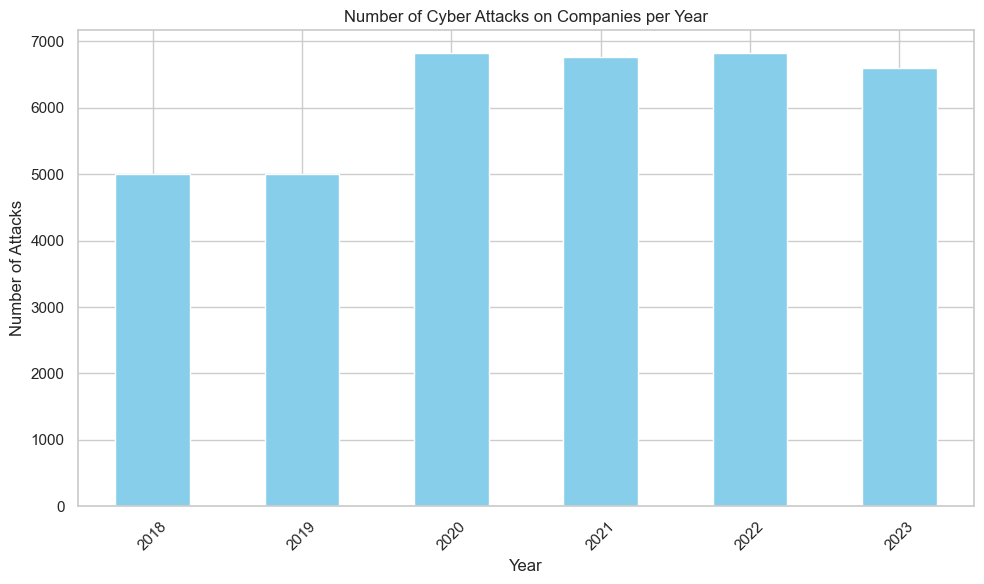

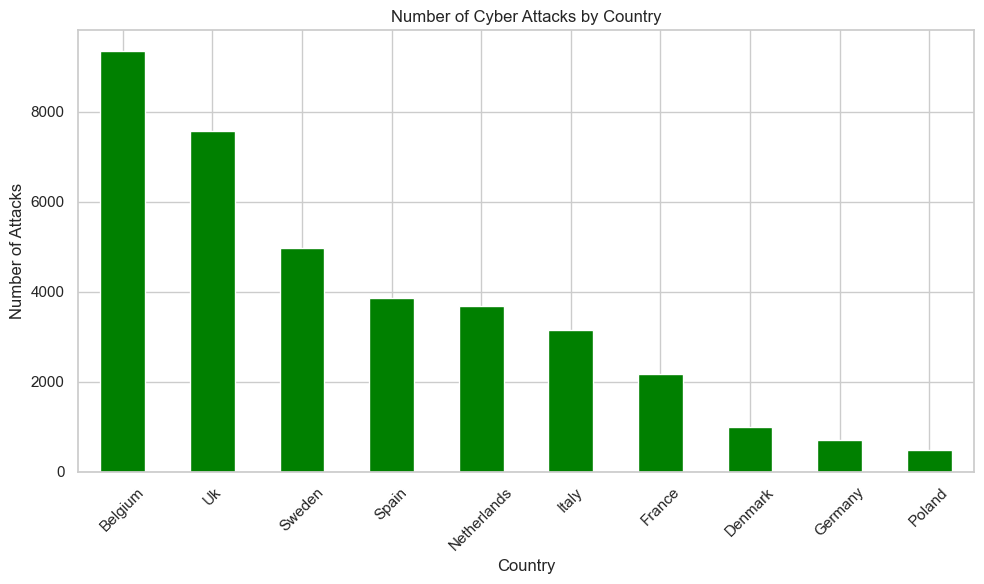

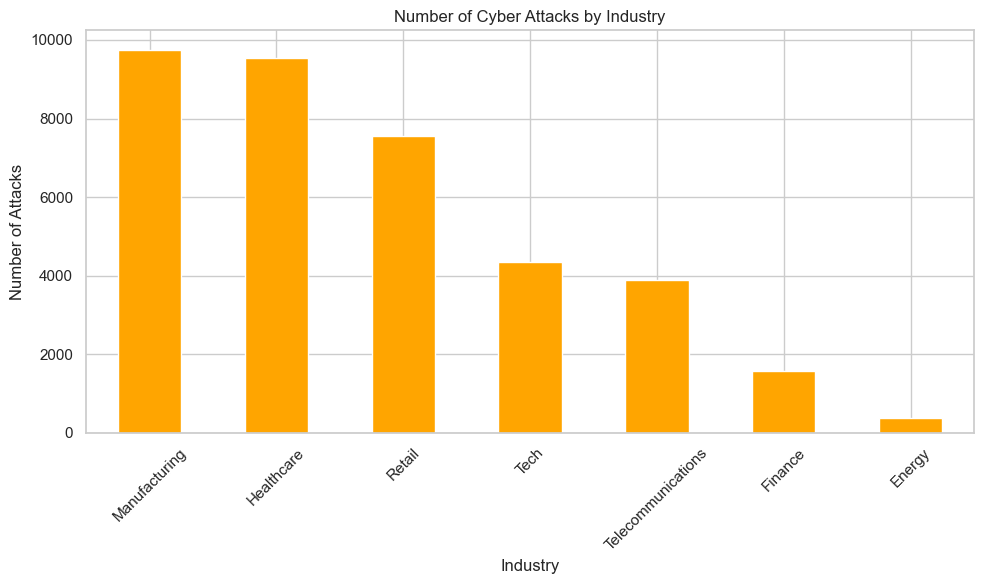

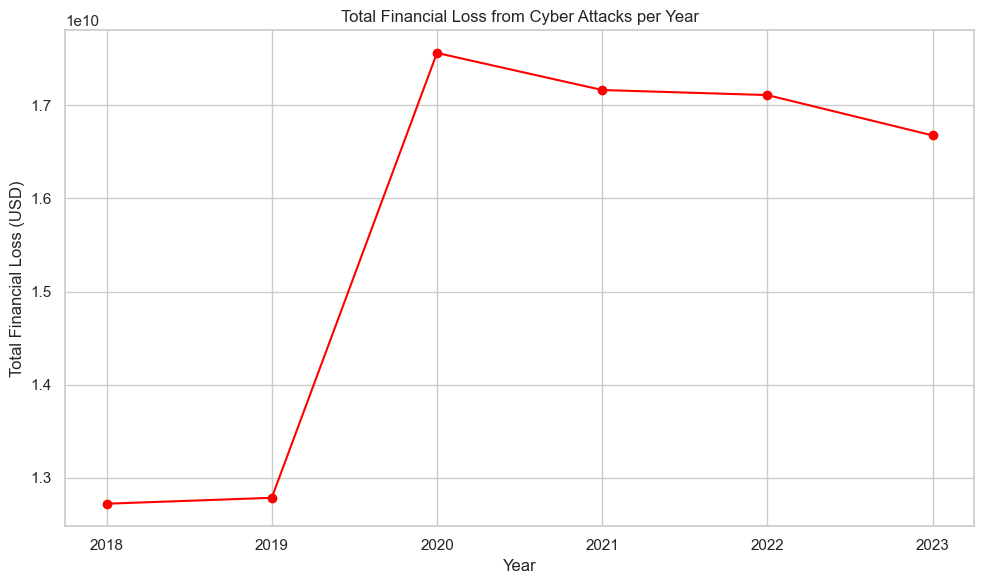

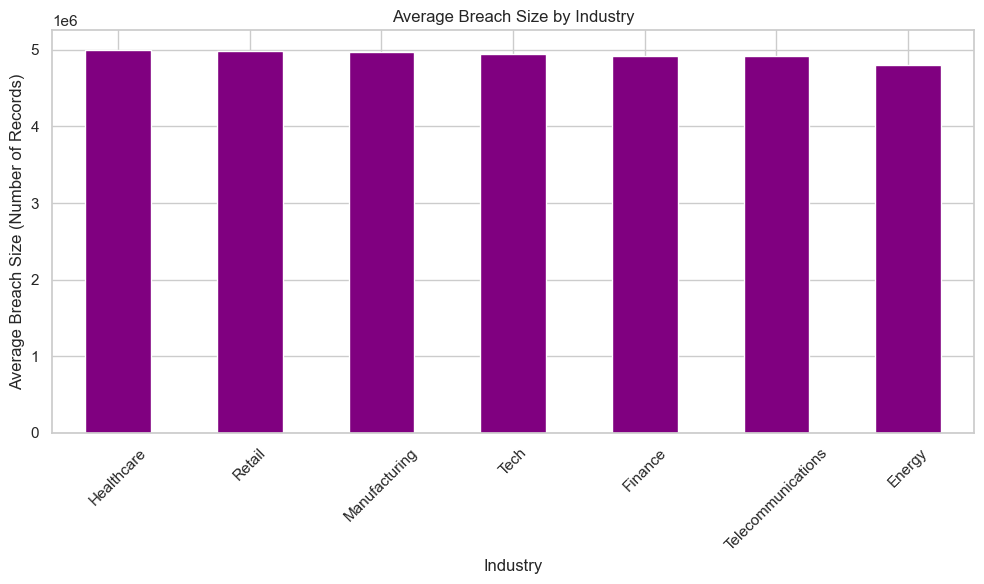

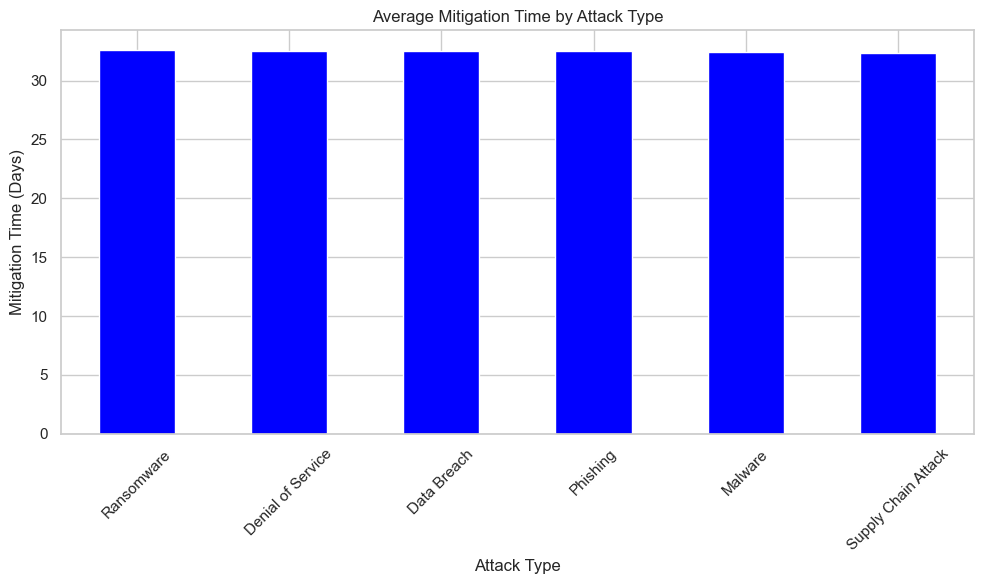

In [3]:
import matplotlib.pyplot as plt

# 1. Number of attacks per year
plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Cyber Attacks on Companies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Number of attacks per country
plt.figure(figsize=(10, 6))
attacks_per_country.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Cyber Attacks by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Number of attacks per industry
plt.figure(figsize=(10, 6))
attacks_per_industry.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Number of Cyber Attacks by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Financial losses per year
plt.figure(figsize=(10, 6))
financial_loss_per_year.plot(kind='line', marker='o', color='red')
plt.title('Total Financial Loss from Cyber Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Total Financial Loss (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Average breach size per industry
plt.figure(figsize=(10, 6))
avg_breach_size_per_industry.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Average Breach Size by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Breach Size (Number of Records)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Average mitigation time per attack type
plt.figure(figsize=(10, 6))
avg_mitigation_time_per_attack.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Average Mitigation Time by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Mitigation Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the companies attack dataset
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')


# 1. Analyze time-based patterns for attacks by year and month
attacks_per_year = data.groupby('Year').size()
attacks_per_month = data.groupby('Month').size()

# 2. Analyze attack types across industries
industry_vs_attack_type = data.groupby(['Industry', 'Attack Type']).size().unstack().fillna(0)

# 3. Analyze attack types based on country
country_vs_attack_type = data.groupby(['Country', 'Attack Type']).size().unstack().fillna(0)

# Plotting the analysis

plt.figure(figsize=(12, 10))

# 1. Bar plot for attacks per year
plt.subplot(3, 1, 1)
attacks_per_year.plot(kind='bar', color='skyblue')
plt.title('Attacks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

# 2. Stacked bar plot for industries vs attack types
plt.subplot(3, 1, 2)
industry_vs_attack_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Industry vs Attack Types')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

# 3. Stacked bar plot for countries vs attack types
plt.subplot(3, 1, 3)
country_vs_attack_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Country vs Attack Types')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the companies attack dataset
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# Set seaborn style
sns.set(style="whitegrid")

# 1. Time Series Analysis: Monthly trends of cyber attacks
attacks_per_month = data.groupby(['Year', 'Month']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(attacks_per_month, cmap='Blues', annot=True, fmt="d")
plt.title("Monthly Trends of Cyber Attacks Over the Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# 2. Severity Levels: Defining severity based on financial loss
def severity_level(row):
    if row['Financial Loss (USD)'] < 500000:
        return 'Low'
    elif 500000 <= row['Financial Loss (USD)'] < 2000000:
        return 'Medium'
    else:
        return 'High'

data['Severity'] = data.apply(severity_level, axis=1)

# Severity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=data, palette='muted')
plt.title("Distribution of Attack Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Count of Attacks")
plt.show()

# 3. Attack Vector Analysis: Attack vectors by country
attack_vector_by_country = data.groupby(['Country', 'Attack Vector']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
attack_vector_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Attack Vectors by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# 4. Correlation Analysis: Correlating Breach Size, Financial Loss, and Mitigation Time
correlation_data = data[['Breach Size (No. of Records)', 'Financial Loss (USD)', 'Mitigation Time (Days)']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Breach Size, Financial Loss, and Mitigation Time")
plt.show()

# 5. Geographical Analysis: Severity levels by country
severity_by_country = data.groupby(['Country', 'Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
severity_by_country.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Severity Levels by Country')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# Set seaborn style
sns.set(style="whitegrid")

# 1. Industry and Attack Vectors Analysis
industry_vs_attack_vector = data.groupby(['Industry', 'Attack Vector']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
industry_vs_attack_vector.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Attack Vectors by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

# 2. Financial Loss and Breach Size Distributions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Financial Loss (USD)', data=data, palette='muted')
plt.title("Distribution of Financial Loss by Industry")
plt.xlabel("Industry")
plt.ylabel("Financial Loss (USD)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack Vector', y='Breach Size (No. of Records)', data=data, palette='Set3')
plt.title("Distribution of Breach Size by Attack Vector")
plt.xlabel("Attack Vector")
plt.ylabel("Breach Size (No. of Records)")
plt.xticks(rotation=45)
plt.show()

# 3. Mitigation Time Analysis: Comparing mitigation time by industry and attack vector
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Mitigation Time (Days)', data=data, palette='coolwarm')
plt.title("Mitigation Time by Industry")
plt.xlabel("Industry")
plt.ylabel("Mitigation Time (Days)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack Vector', y='Mitigation Time (Days)', data=data, palette='magma')
plt.title("Mitigation Time by Attack Vector")
plt.xlabel("Attack Vector")
plt.ylabel("Mitigation Time (Days)")
plt.xticks(rotation=45)
plt.show()

# 4. Adding Severity Column Based on Financial Loss
def severity_level(row):
    if row['Financial Loss (USD)'] < 500000:
        return 'Low'
    elif 500000 <= row['Financial Loss (USD)'] < 2000000:
        return 'Medium'
    else:
        return 'High'

# Apply severity function to create a new column 'Severity'
data['Severity'] = data.apply(severity_level, axis=1)

# Extract Year from 'Date of Incident'
data['Year'] = pd.to_datetime(data['Date of Incident']).dt.year

# Group by 'Year' and 'Severity' for yearly severity trends
severity_year = data.groupby(['Year', 'Severity']).size().unstack().fillna(0)

# Plotting yearly severity trends
plt.figure(figsize=(12, 8))
severity_year.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Yearly Shifts in Attack Severity")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.show()

# 5. Breach Size Distribution by Country and Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Breach Size (No. of Records)', data=data, palette='Blues')
plt.title("Breach Size Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Breach Size (No. of Records)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Breach Size (No. of Records)', data=data, palette='Purples')
plt.title("Breach Size Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Breach Size (No. of Records)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# 1. Temporal Analysis: Monthly and seasonal trends
# Group data by month to observe trends
monthly_trends = data.groupby('Month').size()

# Group by both Year and Month to observe year-on-month trends
year_month_trends = data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot Monthly Trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Cyber Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Year-Month Trends
plt.figure(figsize=(10, 6))
year_month_trends.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Cyber Attacks Over the Years (By Month)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Company-Level Analysis: How specific companies or sectors have been impacted over time
industry_trends = data.groupby(['Year', 'Industry']).size().unstack(fill_value=0)

# Plot Industry Trends
plt.figure(figsize=(10, 6))
industry_trends.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Industry Impact Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Day-Specific Analysis: Incidents by days of the week
data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])
data['DayOfWeek'] = data['Date of Incident'].dt.day_name()

day_of_week_trends = data.groupby('DayOfWeek').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot Day of the Week Trends
plt.figure(figsize=(10, 6))
day_of_week_trends.plot(kind='bar', color='orange')
plt.title('Cyber Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Mitigation Effectiveness: Correlation between mitigation time, breach size, and financial loss
mitigation_effectiveness = data[['Breach Size (No. of Records)', 'Financial Loss (USD)', 'Mitigation Time (Days)']].corr()

# Plot Mitigation Effectiveness (Correlation Matrix)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(mitigation_effectiveness, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Breach Size, Financial Loss, and Mitigation Time")
plt.tight_layout()
plt.show()

# 5. Attack Vector and Financial Impact: Group data by attack vector and calculate average financial loss
attack_vector_financial_loss = data.groupby('Attack Vector')['Financial Loss (USD)'].mean()

# Plot Attack Vector and Financial Loss
plt.figure(figsize=(10, 6))
attack_vector_financial_loss.plot(kind='bar', color='purple')
plt.title('Average Financial Loss by Attack Vector')
plt.xlabel('Attack Vector')
plt.ylabel('Average Financial Loss (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv')

# Convert 'Date of Incident' to datetime to extract more date-related features
data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])

# Add a 'Day of the Week' column
data['DayOfWeek'] = data['Date of Incident'].dt.day_name()

# 1. Company-Level Analysis: Let's look at the top 10 companies with the highest number of incidents
top_companies = data['Company Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='coolwarm')
plt.title('Top 10 Companies with the Most Cyber Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

# 2. Day of the Week Analysis: Analyze attack distribution based on the day of the week
attacks_by_day_of_week = data['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(x=attacks_by_day_of_week.index, y=attacks_by_day_of_week.values, palette='Set2')
plt.title('Cyber Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()

# 3. Breach Size Distribution by Industry: Boxplot to show variation in breach size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Breach Size (No. of Records)', data=data, palette='Purples')
plt.title("Breach Size Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("Breach Size (Number of Records)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Breach Size Distribution by Country: Boxplot for country-specific variation in breach size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Breach Size (No. of Records)', data=data, palette='Blues')
plt.title("Breach Size Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Breach Size (Number of Records)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset correctly
file_path = '../Data Warehousing ETL/Transformed_Data/companies_cyber_attacks_europe.csv'  # Update with your actual path
data = pd.read_csv(file_path)

# Convert 'Date of Incident' to datetime if it exists, else extract date-related features
if 'Date of Incident' in data.columns:
    data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])
    data['Year'] = data['Date of Incident'].dt.year
    data['Month'] = data['Date of Incident'].dt.month
    data['DayOfWeek'] = data['Date of Incident'].dt.day_name()

# 3. Temporal Analysis - Monthly and yearly trends
# Monthly trends
monthly_trends = data.groupby('Month').size() if 'Month' in data.columns else None

# Yearly trends
year_month_trends = data.groupby(['Year', 'Month']).size().unstack(fill_value=0) if 'Year' in data.columns and 'Month' in data.columns else None

# Plot Monthly Trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar', color='skyblue')
plt.title('Cyber Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Year-Month Trends
plt.figure(figsize=(10, 6))
year_month_trends.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Cyber Attacks Over the Years (By Month)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Company-Level Analysis: Analyze impact across sectors over time
industry_trends = data.groupby(['Year', 'Industry']).size().unstack(fill_value=0) if 'Year' in data.columns and 'Industry' in data.columns else None

# Plot Industry Trends
plt.figure(figsize=(10, 6))
industry_trends.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Industry Impact Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Day-Specific Analysis: Incidents by days of the week
day_of_week_trends = data['DayOfWeek'].value_counts() if 'DayOfWeek' in data.columns else None

# Plot Day of the Week Trends
plt.figure(figsize=(10, 6))
day_of_week_trends.plot(kind='bar', color='orange')
plt.title('Cyber Attacks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 2. Time to Mitigate Analysis: How has the average mitigation time evolved over the years?
mitigation_time_per_year = data.groupby('Year')['Mitigation Time (Days)'].mean()

plt.figure(figsize=(10, 6))
mitigation_time_per_year.plot(kind='line', marker='o', color='red')
plt.title('Average Mitigation Time per Year')
plt.xlabel('Year')
plt.ylabel('Average Mitigation Time (Days)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Severity by Attack Vector
data['Severity'] = data.apply(lambda row: 'Low' if row['Financial Loss (USD)'] < 500000 
                              else 'Medium' if 500000 <= row['Financial Loss (USD)'] < 2000000 
                              else 'High', axis=1)
severity_by_attack_vector = data.groupby(['Attack Vector', 'Severity']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
severity_by_attack_vector.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Severity Levels by Attack Vector')
plt.xlabel('Attack Vector')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Multi-factor Analysis: Industry, Attack Vector, and Breach Size
industry_attack_breach = data.groupby(['Industry', 'Attack Vector'])['Breach Size (No. of Records)'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 8))
industry_attack_breach.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Average Breach Size by Industry and Attack Vector')
plt.xlabel('Industry')
plt.ylabel('Average Breach Size (No. of Records)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Survival Analysis: Breach Size vs Mitigation Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Breach Size (No. of Records)", y="Mitigation Time (Days)", hue="Industry", data=data, palette="Set2", alpha=0.6)
plt.title("Breach Size vs Mitigation Time (Days)")
plt.xlabel("Breach Size (No. of Records)")
plt.ylabel("Mitigation Time (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()
